#### Technique we will have to use:
1. Mean/Median/Mode
2. Random Sample Imputation
3. Capturing NaN with a new Feature
4. End of distribution
5. Arbitary Value
6. Most Frequent Value
7. Capturing NaN with a new Feature with Most Frequent Value
8. New value for NaN - Example `Missing`

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# fig_ = plt.figure()
# ax_  = fig_.add_subplot(111)
# df_.loc[:, 'Age'].plot(kind = 'kde', ax = ax_)
# df_.loc[:, 'Age_median'].plot(kind = 'kde', ax = ax_, color = 'red')
# lines_, labels_ = ax_.get_legend_handles_labels()
# ax_.legend(lines_, labels_, loc = 'best')
# plt.show()

In [3]:
#### import the dataset
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df1 = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


#### Mean / Median / Mode

In [4]:
df.isnull().sum()

Survived      0
Age         177
Cabin       687
dtype: int64

In [5]:
#### Mean, Median, Mode should be used in Numerical column
mean_ = df.loc[:, 'Age'].mean()
df.loc[:, 'Age'] = df.loc[:, 'Age'].fillna(mean_)

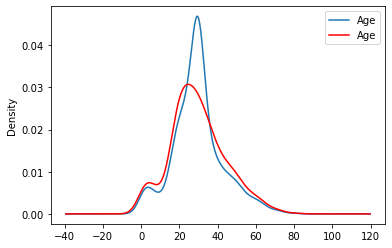

In [6]:
#### Check the distribution

fig_ = plt.figure()
ax_  = fig_.add_subplot(111)
df.loc[:, 'Age'].plot(kind = 'kde', ax = ax_)
df1.loc[:, 'Age'].plot(kind = 'kde', ax = ax_, color = 'red')
lines_, labels_ = ax_.get_legend_handles_labels()
ax_.legend(lines_, labels_, loc = 'best')
plt.show()

In [7]:
#### Median
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df1 = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])

median_ = df.loc[:, 'Age'].median()
df.loc[:, 'Age'] = df.loc[:, 'Age'].fillna(median_)

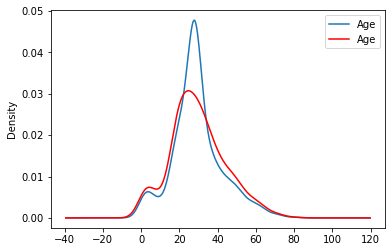

In [8]:
#### Check the distribution

fig_ = plt.figure()
ax_  = fig_.add_subplot(111)
df.loc[:, 'Age'].plot(kind = 'kde', ax = ax_)
df1.loc[:, 'Age'].plot(kind = 'kde', ax = ax_, color = 'red')
lines_, labels_ = ax_.get_legend_handles_labels()
ax_.legend(lines_, labels_, loc = 'best')
plt.show()

In [9]:
#### Mode 
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df1 = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])

mode_ = df.loc[:, 'Age'].mode()
df.loc[:, 'Age'] = df.loc[:, 'Age'].fillna(mode_)

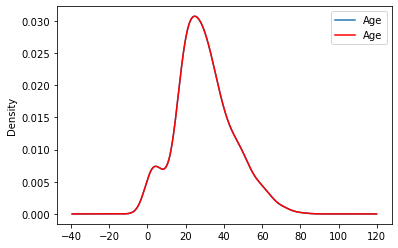

In [10]:
#### Check the distribution

fig_ = plt.figure()
ax_  = fig_.add_subplot(111)
df.loc[:, 'Age'].plot(kind = 'kde', ax = ax_)
df1.loc[:, 'Age'].plot(kind = 'kde', ax = ax_, color = 'red')
lines_, labels_ = ax_.get_legend_handles_labels()
ax_.legend(lines_, labels_, loc = 'best')
plt.show()

#### Advantage:
1. Easy to implement
2. Robust to the outliers
3. Not increasing the new features in the dataset

#### Disadvantage:
1. It distorts the orginal distribution.

#### 2. Random Sample Imputation

In [11]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df1 = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


In [12]:
#### It will work on the categorical and numerical data and completely at Random
index_ = list(df.loc[:, 'Age'].dropna().sample(df.loc[:, 'Age'].isnull().sum(), random_state = 0).index)
value_ = list(df.loc[:, 'Age'].dropna().sample(df.loc[:, 'Age'].isnull().sum(), random_state = 0).values)
#### null index find
null_index_ = df.loc[df.loc[:, 'Age'].isnull(), 'Age'].index
null_index_ = list(null_index_)
for pick_, _index in enumerate(null_index_):
    df.loc[_index, 'Age'] = value_[pick_]
print("done")

done


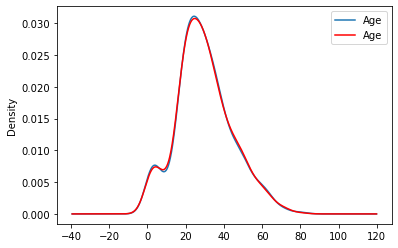

In [13]:
##### Distribution Check
fig_ = plt.figure()
ax_  = fig_.add_subplot(111)
df.loc[:, 'Age'].plot(kind = 'kde', ax = ax_)
df1.loc[:, 'Age'].plot(kind = 'kde', ax = ax_, color = 'red')
lines_, labels_ = ax_.get_legend_handles_labels()
ax_.legend(lines_, labels_, loc = 'best')
plt.show()

#### Advantage:
1. Easy to implement
2. No distortion in the real distribution
3. Not increasing the additinal features

#### Disadvantage:
1. Sometimes this randomness did not work at all.

#### 3. Capturing NaN value with a new feature

In [14]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df1 = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


In [15]:
df.loc[:, 'Age_Capture_NaN'] = np.where(df.loc[:, 'Age'].isnull(), 1, 0)
df.loc[:, 'Age'] = df.loc[:, 'Age'].fillna(df.loc[:, 'Age'].median())
df.head()

,Survived,Age,Cabin,Age_Capture_NaN
0,0,22.0,NaN,0
1,1,38.0,C85,0
2,1,26.0,NaN,0
3,1,35.0,C123,0
4,0,35.0,NaN,0


#### Advantage:
1. Easy to implement
2. Capturing importance of missing Value

#### Disadvantage:
1. Increasing the additinal feature
2. Missing that has will be imputed with other technique might lead to distort the orginal distribution

#### End of Distribution 

In [16]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df1 = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


<AxesSubplot:xlabel='Age'>

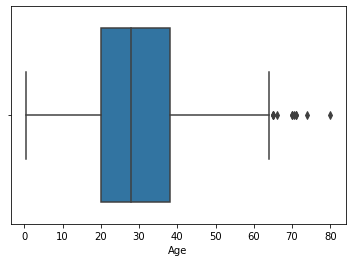

In [17]:
import seaborn as sns
sns.boxplot(x = df.loc[:, 'Age'])

In [18]:
df.loc[:, 'Age'] = df.loc[:, 'Age'].fillna(82)
df.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


<AxesSubplot:xlabel='Age'>

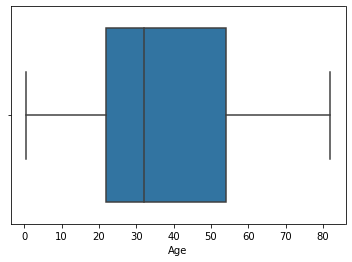

In [19]:
sns.boxplot(x = df.loc[:, 'Age'])

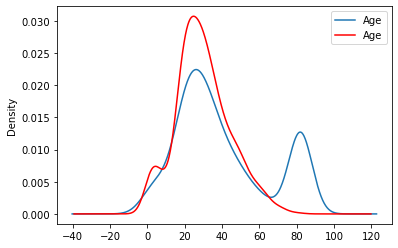

In [20]:
##### Plot the Distribution
fig_ = plt.figure()
ax_  = fig_.add_subplot(111)
df.loc[:, 'Age'].plot(kind = 'kde', ax = ax_)
df1.loc[:, 'Age'].plot(kind = 'kde', ax = ax_, color = 'red')
lines_, labels_ = ax_.get_legend_handles_labels()
ax_.legend(lines_, labels_, loc = 'best')
plt.show()

#### Advantage:
1. Easy to implement
2. Robust to the outliers
3. Not increasing the additinal feature

#### Disadvantage:
1. Distorts the orginal variance or distribution

#### Arbitary Value

In [21]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df1 = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


<AxesSubplot:ylabel='Frequency'>

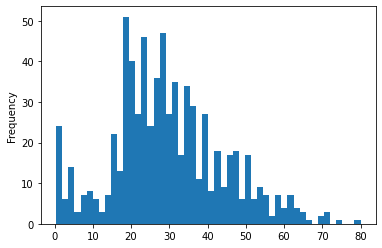

In [22]:
df.loc[:, 'Age'].plot(kind = 'hist', bins = 50)

In [23]:
df.loc[:, 'Age'] = df.loc[:, 'Age'].fillna(100)
df.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


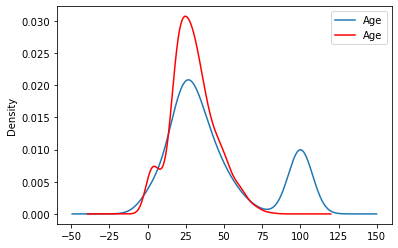

In [24]:
##### Plot the Distribution
fig_ = plt.figure()
ax_  = fig_.add_subplot(111)
df.loc[:, 'Age'].plot(kind = 'kde', ax = ax_)
df1.loc[:, 'Age'].plot(kind = 'kde', ax = ax_, color = 'red')
lines_, labels_ = ax_.get_legend_handles_labels()
ax_.legend(lines_, labels_, loc = 'best')
plt.show()

#### Advantage:
1. Easy to implement
2. Capturing the importance of missing value

#### Disadvantage:
1. Distorts the orginal distribution.
2. Hard to decide the value, which should be taken

#### Most Freqency Value imputation

In [25]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df1 = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


In [26]:
#### It normally works for the categorical data
df.loc[:, 'Cabin'].isnull().sum()

687

In [27]:
df.loc[:, 'Cabin'] = df.loc[:, 'Cabin'].value_counts().sort_values(ascending = False).index[0]
df.loc[:, 'Cabin'].isnull().sum().sum()

0

#### Advantage:
1. Easy to implement
2. Not inreasing the additinal features - No Curse of Dimensionality

#### Disadvtange:
1. Distorts the orginal distribution
2. This might lead to over representation if NaN values are huge

#### Capturing NaN value with a new feature 

In [28]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df1 = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


In [29]:
df.loc[:, 'Capture_NaN_Cabin'] = np.where(df.loc[:, 'Cabin'].isnull(), 1, 0)
df.head()

,Survived,Age,Cabin,Capture_NaN_Cabin
0,0,22.0,NaN,1
1,1,38.0,C85,0
2,1,26.0,NaN,1
3,1,35.0,C123,0
4,0,35.0,NaN,1


#### Advantage:
1. Easy to implement
2. Capturing the importance of missing Value

#### Disadvantage:
1. Inreasing the additional feature - Curse of dimensionality

#### New Value for NaN - Example `Missing`

In [30]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df1 = pd.read_csv('titanic.csv', usecols = ['Age', 'Cabin', 'Survived'])
df.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


In [31]:
df.loc[:, 'Cabin'] = df.loc[:, 'Cabin'].fillna('Missing')
df.loc[:, 'Cabin'].isnull().sum().sum()

0

#### Advantage:
1. Easy to implement
2. By using the new name it might capture the importance the missing value

#### One Hot Encoding with top 10 features

In [32]:
df = pd.read_csv('adult.csv', na_values = ['?', '??'], usecols = ['occupation'])
df.head()

,occupation
0,Machine-op-inspct
1,Farming-fishing
2,Protective-serv
3,Machine-op-inspct
4,NaN


In [33]:
#### One Hot Encoding with top 10 features
df.loc[:, 'occupation'].nunique()

14

In [34]:
#### Taking top 10 categories from the dataset
top_ten_ = list(df.loc[:, 'occupation'].value_counts(ascending = False).head(10).index)
for top_ in top_ten_:
    print(top_, end = " || ")

Prof-specialty || Craft-repair || Exec-managerial || Adm-clerical || Sales || Other-service || Machine-op-inspct || Transport-moving || Handlers-cleaners || Farming-fishing || 

In [35]:
for index_, category_value_ in enumerate(df.loc[:, 'occupation']):
    if category_value_ in top_ten_:
        pass
    else:
        df.loc[index_, 'occupation'] = 'unknown'
print("Done !")

Done !


In [36]:
df.loc[:, 'occupation'].nunique()

11

In [38]:
#### Now One Hot Encoding 
pd.get_dummies(df, columns = ['occupation'], drop_first = True)

,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Transport-moving,occupation_unknown
0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,1
48838,0,0,0,0,1,0,0,0,0,0
48839,0,0,0,0,0,0,0,0,0,0
48840,0,0,0,0,0,0,0,0,0,0


#### Advantage:
1. Easy to implement - Popular
2. Not increasing a high number of features using this technique

#### Disadvantage:
1. It might have Curse of Dimensionality
2. Sparse Matrix 